## Naive PageRank Algorithm 

In this tutorial, we will be going over a simple version of the PageRank algorithm that is invented by Google cofounders S. Brin and L. Page. In their paper published in 1998, they introduced a more complicated algorithm for their search engine Google similar to this.

We will follow the guidelines listed in Example 9 in section 2.1 of  Bretscher's fifth edition Linear Algenbra with Applications texbook.  On a side note, this problem has some similarities to the input-output economic model introduced in Exercise 24 in Section 1.1 of Bretscher. 

Assume that we have 3 webpages, pages a, b and c. 
<ul>
<li> Initially, proportion of people visiting web pages a, b and c are $x_1, x_2$, and $x_3$, respectively. </li>
<li> These proportions will add up to 1, i.e., $x_1+x_2+x_3=1$.</li>
<li> On each page there are links to other webpages, as follows: </li>
<ul>
<li> On page a, there are links to webpages b and c; </li>
<li> on webpage b, there are links to webpages a and c, and </li>
<li> on webpage c, there is only one link to webpage a. </li>
</ul>
Since there are multiple values for some webpages, using a dictionary is a good idea for this. So, we create the dictionary 

links={'a':{'b','c'},'b':{'a','c'},'c':{'a'}}    
        
<li> At a predetermined time, we assume that all visitors randomly follow a link on the webpage that they are currently visiting.</li>
<li> We assume that proportion of people following different links(if any) on a given webpage is equal. </li>
<li> We want to know what the distribution looks like after one step, multiple steps and in the long run.</li>
</ul>

Let vector $x=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}$ collects initial distribution information and vector $y=\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}$ after one step. Note that the sum $y_1+y_2+y_3=1$ must hold, as well.

Let's find out proportion of visitors on each webpage after one step: 
<ul>
    <li> Since there is a link to webpage a in webpages b and c, half of all people visiting webpage b, $x_2/2$ (since there are two links on webpage b), and all of visitors on webpage c, $x_3$, will follow links to webpage a. Thus, $y_1=x_2/2+x_3$. 

Similarly, there will be $y_2=x_1/2$ visitors on webpage b(link for webpage b is only on webpage a) and $y_3=x_1/2+x_2/2$ visitors on page c (there are links to webpage c on webpages a and b).</li>
</ul>
So, we have

$y_1=\dfrac{x_2}{2}+x_3$

$y_2=\dfrac{x_1}{2}$

$y_3=\dfrac{x_1}{2}+\dfrac{x_2}{2}$

As you see, this is a system of linear equations. The matrix corresponding to this system is called the ${\it transition~ matrix}$. Therefore, we can use scipy.linalg and numpy packages for problems like these.

Now, we will formulate the problem and write its transition matrix in Python. We start with importing all packages that we need. 

In [1]:
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt

pages=['a','b','c']

links={'a':{'b','c'},'b':{'a','c'},'c':{'a'}}

#To compute entries of the transition matrix, we need to know number of links on each webpage.

number_links={}
for item, value in links.items():
    number_links[item]=len(value)

print(number_links)

{'a': 2, 'b': 2, 'c': 1}


Note that, we used sets for values in the links dictionary. This will give us a flexibility in the if statement below since we will only be checking if a website has a link or not.

To build our transition matrix, we will follow the guidelines given in the introduction and I would like to explain the portions of the code:

We will be constructing our matrix row by row and store each row in the list vectors. Later we will use vectors list to create an array. We will be using two for loops: One of them will go through the set that is given for each key and the other one will be going through the dictionary keys (i.e., each webpage).

Each time, we start with an empty temporary list corresponding each row. By using an if-else statement, we will find out entries of that row and add it to the temporary list lst. After all the iterations are completed for that current key, we will add the list to the vectors list (defined outside so that it becomes permanent). When the first for loop starts again for the next key, lst=[] will make sure to empty the temporary lst from previous loop. To see what happens at each step, I added a print() statement. Later when we combine all this code, we won't have that. 

Note that vectors.append(lst) code's indentation level is aligned with the inner for loop.

We are checking whether there are links to other webpages on a given webpage. If there is a link, then a proportion of the visitors of the current webpage will follow that link. The proportion is determined by the total number of links on that webpage. Therefore, we will use number_links dictionary for that. If there is no link, the proportion will be zero, so we should record that, as well. 

Note that using two dictionaries with the same keys is helpful in our code. 

In [2]:
vectors=[]

for i in pages:
    lst=[]   #this is to build the rows one by one from scratch.
    for j in links.keys():
        if i in links[j]:
            y=1/number_links[j]
            lst.append(y)
            print('Coefficient {} corresponds to the proportion of visitors from {} to the webpage {}'.format(y,j,i))
        else:
            lst.append(0)        
    vectors.append(lst)

transition_matrix=np.array(vectors)

transition_matrix

Coefficient 0.5 corresponds to the proportion of visitors from b to the webpage a
Coefficient 1.0 corresponds to the proportion of visitors from c to the webpage a
Coefficient 0.5 corresponds to the proportion of visitors from a to the webpage b
Coefficient 0.5 corresponds to the proportion of visitors from a to the webpage c
Coefficient 0.5 corresponds to the proportion of visitors from b to the webpage c


array([[0. , 0.5, 1. ],
       [0.5, 0. , 0. ],
       [0.5, 0.5, 0. ]])

Notice that each column sum=1. 

Now, we have our transition matrix, let's go over some problems:

### Problem 1: What is the distribution after one step?

Let's say initially 15%, 40% and 45% people are visiting web pages a, b and c, respectively. What would be the distribution after one step?

In [3]:
x=np.array([0.15,0.40,0.45])

A=transition_matrix

y=np.dot(A,x)

y

array([0.65 , 0.075, 0.275])

This shows that 65% of all people will be visiting webpage a after one step even though there were only 15% visiting initially. Only about 8% of all people visits webpage b. The reason of this sharp decline is due to the fact that only webpage a had a link to webpage b, and there were less people visiting webpage a initially. 

### Problem 2: Will more or fewer people visit webpage b after two steps?

In [4]:
np.dot(A,y)

array([0.3125, 0.325 , 0.3625])

There will be more people visiting webpage b. 

Alternatively, we could do this by computing second power of $A$ first and then applying $A^2$ to the initial distribution vector $x$. Since matrix-matrix multiplication corresponds to compositions of linear transformations, the result should be the same.

In [5]:
Asq=np.linalg.matrix_power(A,2)

np.dot(Asq,x)

array([0.3125, 0.325 , 0.3625])

We get the same result. However notice that there is a great difference in the results after one step and two steps. If we would like to rank webpages according to their importance, we need more information.

### Problem 3: What would be the proportion of people visiting webpages after 100 steps?

In [6]:
A100=np.linalg.matrix_power(A,100)

np.dot(A100,x)

array([0.44444444, 0.22222222, 0.33333333])

This shows that after 100 steps, webpage a has more visitors than webpages b and c. 

Next, let's take a look at the trend of webpage a before 100 steps. For this, we will compute all the distributions until 100 steps and then plot them. Note that a similar analysis can be made for webpages b and c, as well.

### Problem 4: What is the trend of the proportions of people visiting webpage a?

For these type of questions, it is best to plot the data and look at the pattern. First, we will compute all the distibutions up to and including 100 steps and store that information in a list. Then we will use this list to plot the line graph. For this, we will be using graphing package matplotlib.pyplot.

In [7]:
lst=[]

for i in range(1,101):
    M=np.linalg.matrix_power(A,i)
    y=np.dot(M,x)
    lst.append((i,y[0]))  #y[0] is for webpage a

#let's see what the first and last output look like:    
print(lst[0],lst[-1])

(1, 0.65) (100, 0.4444444444444444)


Now, we will plot this data:

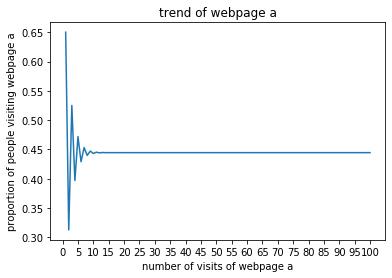

In [8]:
x_values=[]
y_values=[]

for item in lst:
    x_values.append(item[0])
    y_values.append(item[1])
    
plt.plot(x_values,y_values)
plt.xlabel('number of visits of webpage a')
plt.xticks(np.arange(0,101,5))
plt.ylabel('proportion of people visiting webpage a')
plt.title('trend of webpage a')


plt.show()


It seems like the proportion of all people visiting webpage a is settled even before 20th round. Let's look closer. For this we will only change the number of iterations and create new lists for the plot:

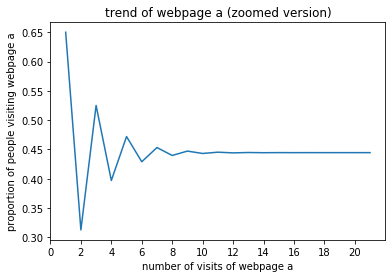

In [9]:
x20_values=[]
y20_values=[]

for item in lst[0:21]:
    x20_values.append(item[0])
    y20_values.append(item[1])
    
plt.plot(x20_values,y20_values)
plt.xlabel('number of visits of webpage a')
plt.xticks(np.arange(0,21,2))
plt.ylabel('proportion of people visiting webpage a')
plt.title('trend of webpage a (zoomed version)')

plt.show()

This looks pretty cool.  This shows that after a certain time, about 45% people will be visiting webpage a, about %33 percent visiting webpage c and about 22% will be visiting webpage b. Note that initially only 15% of all people were on page a. 

In this case, the highest ranked webpage will be webpage a, then webpage c and then webpage b. 

### Problem 5: Is there an equilibrium distribution? Which webpage has the highest naive PageRank?

In other words, is there an initial distribution where the proportion of people visiting each webpage does not change after one step? We can formulate this problem as $Ax=x$. So, we will be looking for a solution $x$ satisfying this equation. However, we cannot solve this equation like this as both sides have the unknown vector $x$. So, we write

$Ax=x \Rightarrow Ax-x=0 \Rightarrow (A-I)x=0$ 

where $I$ is the identity matrix and $0$ is the zero vector. Now, we can look for solutions of this new system. 

In numpy, identity matrix is given as np.identity(n) where n is the size of the matrix $A$. In our case, $A$ is a $3\times 3$ matrix, so we will use np.identity(3).

In [10]:
B=A-np.identity(3)

B

array([[-1. ,  0.5,  1. ],
       [ 0.5, -1. ,  0. ],
       [ 0.5,  0.5, -1. ]])

Neither scipy.linalg not numpy.linalg has a built-in function for finding rref. So, let's reduce this to an upper triangular matrix manually.

In [11]:
C=B   #redefined not to change the original matrix B
C[1]=0.5*B[0]+B[1]
C[2]=0.5*B[0]+B[2]
C[2]=B[1]+B[2]

C

array([[-1.  ,  0.5 ,  1.  ],
       [ 0.  , -0.75,  0.5 ],
       [ 0.  ,  0.  ,  0.  ]])

This shows that if $x=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}$, then we have

$-x_1+0.5x_2+x_3=0$

$-0.75x_2+0.5x_3=0$

implying that 

$x_1=0.5x_2+x_3$ and $x_2=\dfrac{0.5x_3}{0.75} \Rightarrow x_2=\dfrac{2}{3}x_3$ and $x_1=\dfrac{4}{3}x_3$. 

Note that we must have $x_1+x_2+x_3=1$, so this implies that 

$\dfrac{4}{3}x_3+\dfrac{2}{3}x_3+x_3=1 \Rightarrow x_3=\dfrac{1}{3}$. 

Therefore, the equilibrium distribution is

$x_{equ}=\begin{bmatrix}\dfrac{4}{9}\\\dfrac{2}{9}\\\dfrac{1}{3}\end{bmatrix}$. 

In [12]:
x_equ=np.array([4/9,2/9,1/3])

x_equ

array([0.44444444, 0.22222222, 0.33333333])

This was exactly what we observed in Problem 3 and explored more in Problem 4 for webpage a. In fact, if we look at what happens after $n$ steps and take limit, we should get the same distribution. Indeed, it can be shown that $\displaystyle{\lim_{n\to\infty} (A^{n}x)=x_{equ}}$.

This means that no matter what the initial distribution is, final distribution will always be $y=\begin{bmatrix}0.44444444\\0.22222222\\0.33333333\end{bmatrix}$ in the long run. 

Therefore, webpage a has the highest naive PageRank followed by webpage c and webpage b with this configuration.


### Problem 6: If we know the distribution after one step, can we get the initial distribution?

In this problem, we are going backwards. That is, assume that $y$ is given in $Ax=y$. We want to find $x$. Thus, we need to solve this problem for $x$. 

In [13]:
y_1=[0.35,0.25,0.4]

la.solve(A,y_1)


array([0.5, 0.3, 0.2])

However, this may not be working all the time. For example, let's look at the following example. 

In [14]:
y_2=[0.4,0.35,0.25]

la.solve(A,y_2)


array([ 0.7, -0.2,  0.5])

This doesn't make sense, a proportion cannot be negative. Therefore, in this case, there is no initial distribution resulting in the distribution $y=[0.4,0.35,0.25]$. Therefore, we need to make sure that all the entries in vector $x$ are nonnegative. We can do that with an if-else statement. If one of the entries is negative, the process stop and writes No solution. 

In [15]:
def get_initial(A,y):
    x=la.solve(A,y)
    for i in range(0,3):
        if x[i]<0:
            return "No solution"
            break
        else:
            continue
    return x

y_1=[0.35,0.25,0.4]
y_2=[0.4,0.35,0.25]

print('Initial distribution if Ax={}: {}'.format('y_1',get_initial(A,y_1)))
print('Initial distribution if Ax={}: {}'.format('y_2',get_initial(A,y_2)))



Initial distribution if Ax=y_1: [0.5 0.3 0.2]
Initial distribution if Ax=y_2: No solution


If $rank(A)=3$, then the matrix is invertible. In this case, we could use 

$y=Ax \rightarrow x=A^{-1}y$ 

to find initial distribution $x$.

To find the rank of the matrix, we use linalg.matrix_rank() in numpy package. (Not scipy linalg submodule)


In [16]:
rank_A=np.linalg.matrix_rank(A)

rank_A

3

In [17]:
def get_initial2(A,y):
    if np.linalg.matrix_rank(A)==len(pages):
        Ainv=la.inv(A)
        x=np.dot(Ainv,y)
    for i in range(0,3):
        if x[i]<0:
            return "No solution"
            break
        else:
            continue
    return x

A=transition_matrix
y_1=[0.35,0.25,0.4]
y_2=[0.4,0.35,0.25]

print('Initial distribution if Ax={}: {}'.format('y_1',get_initial2(A,y_1)))
print('Initial distribution if Ax={}: {}'.format('y_2',get_initial2(A,y_2)))

Initial distribution if Ax=y_1: [0.5 0.3 0.2]
Initial distribution if Ax=y_2: No solution


### Problem 7: Comparing different webpages

In this problem, we will see how we can use our knowledge in real life.

Assume that we have an online website with five webpages. Currently, our webpage link configuration is as follows:

pages=['a','b','c','d','e']

current_version={'a':{'b','e'},'b':{'c','d','e'},'c':{'a','d'},'d':{'b','c'},'e':{'a','d'}}

We would like to compute naive PageRank of these webpages. Our data analysis team reported that a visitor usually follow a total of three links before leaving our webpage. We first want to find out which webpage has more visitors after three transitions. 

In order to make this problem simpler, we will assume that initially an equal proportion of visitors are visiting each webpage. In addition, we will assume that every visitor follows exactly three links before they leave the website. 

We first write functions for the transition matrix, and the pagerank order.

In [18]:
#First code gives the transition matrix
def transition_matrix(pages,links):
    number_links={}
    for item, value in links.items():
        number_links[item]=len(value)
    vectors=[]
    for i in pages:
        lst=[]   #this is to build the rows one by one from scratch.
        for j in links.keys():
            if i in links[j]:
                y=1/number_links[j]
                lst.append(y)
            else:
                lst.append(0)        
        vectors.append(lst)
    transition_matrix=np.array(vectors)
    return transition_matrix

#since we have more webpages, we write a function to sort them
def pagerank_order(A,x):
    y=np.dot(A,x)
    lst=list(zip(list(y),pages))
    sorted_lst=sorted(lst,reverse=True)
    return sorted_lst

Let's see if our code works well with the problem that we covered above.

In [19]:
pages1=['a','b','c']
links1={'a':{'b','c'},'b':{'a','c'},'c':{'a'}}
x1=np.array([0.15,0.40,0.45])

A1=transition_matrix(pages1,links1)

print(pagerank_order(A1,x))

[(0.65, 'a'), (0.275, 'c'), (0.075, 'b')]


This was just as before. Let's go back to our problem.

In [20]:
pages=['a','b','c','d','e']
current_version={'a':{'b','e'},'b':{'c','d','e'},'c':{'a','d'},'d':{'b','c'},'e':{'a','d'}}
new_x=np.array([0.2,0.2,0.2,0.2,0.2])

A_new=transition_matrix(pages,current_version)
A3=np.linalg.matrix_power(A_new,3)

pagerank_order(A3,new_x)

[(0.26111111111111107, 'd'),
 (0.2, 'b'),
 (0.19444444444444442, 'c'),
 (0.18333333333333335, 'a'),
 (0.1611111111111111, 'e')]

After three steps, we see that webpage d has the highest naive PageRank followed by webpages b, c, a, and e. If we have an important topic that we want to share with our visitors, webpage d would be the best choice.

### Problem 8: Let's consider the website with 5 webpages. We want to increase pagerank of webpage a to 1 by adding more links to webpage a. Is it possible? If possible what should be the best configuration?

In [21]:
pages=['a','b','c','d','e']
current_version={'a':{'b','e'},'b':{'c','d','e'},'c':{'a','d'},'d':{'b','c'},'e':{'a','d'}}
new_x=np.array([0.2,0.2,0.2,0.2,0.2])

version_1={'a':{'b','e','c'},'b':{'c','d','e'},'c':{'a','d'},'d':{'b','c'},'e':{'a','d'}}
version_2={'a':{'b','e','d'},'b':{'c','d','e'},'c':{'a','d'},'d':{'b','c'},'e':{'a','d'}}
version_3={'a':{'b','e','c','d'},'b':{'c','d','e'},'c':{'a','d'},'d':{'b','c'},'e':{'a','d'}}

version_list=[current_version,version_1,version_2,version_3]

for item in version_list:    
    A0=transition_matrix(pages,item)
    version_matrix=np.linalg.matrix_power(A0,3)
    p=pagerank_order(version_matrix,new_x)
    print(p)


[(0.26111111111111107, 'd'), (0.2, 'b'), (0.19444444444444442, 'c'), (0.18333333333333335, 'a'), (0.1611111111111111, 'e')]
[(0.25555555555555554, 'd'), (0.2472222222222222, 'c'), (0.18888888888888888, 'a'), (0.18055555555555555, 'b'), (0.1277777777777778, 'e')]
[(0.3, 'd'), (0.21388888888888888, 'c'), (0.18611111111111112, 'b'), (0.17222222222222222, 'a'), (0.1277777777777778, 'e')]
[(0.2902777777777778, 'd'), (0.24444444444444446, 'c'), (0.17916666666666667, 'a'), (0.175, 'b'), (0.11111111111111112, 'e')]


Unfortunately, with these configurations, we could increase pagerank of webpage a by only one rank higher. So, it is not possible. Therefore, to increase webpage a ranking, there should another configuration. 



More thoughts: Here are the ranking with each version:

current_version -> d, b, c, a, e

version_1 -> d, c, a, b, e

version_2 -> d, c, b, a, e

version_3 -> d, c, a, b, e

In any case, webpage d has the highest naive PageRank while webpage e has the worst. Notice that adding more links to webpage a lowers webpage b's ranking. However, if we look at percentages given above, proportion of all people visiting webpage b is not that different than the current version. 

You could try many different combinations and maybe one of them would make webpage a as the most visited page after three visits. You can even try many different versions of this problem.